# Introduction

This project looks at Percolation, starting with the square lattice $\{0, 1, ..., n-1\}^2$ before moving on to the triangular lattice. We are looking at site percolation where we choose, independently with some probability $p\in [0,1]$ to colour each site either yellow or blue. Once we establish the fundamental concepts of site percolation, our project investigates the changes to the system, and to the critical point, when certain variables such as structure, shape and choice of site probability of our lattices are altered. What follows is our response to tasks 1, 2, 3, 4, 6, 7, 8, and 10 from the original outline.

![Robot :)](diagrams/robot_cropped.png)

# Project Structure and Version Control

We decided to structure our project using separate Python .py files instead of one Jupyter notebook to allow for the use of Git Version Control. We still wanted to use a Jupyter notebook to present our work but decided to use it as little as possible. We also used Object Oriented Design to structure our code to allow us to work on different modules separately in a way that would be easy to integrate. Below you can see our class diagram.

![Class Diagram](diagrams/class_diagram.png)

We wanted as much code flexibility as possible without "over-engineering" the design. In that vein we used a mixture of composition and inheritence to structure our project so that path finding algorithms and lattices can be easily run, modified and extended.

This resulted in the file structure:

- Percolation (Group 2).ipynb
- percolation.py
- path_finders.py
- helpers.py

On the use of Git, we saw it as an opportunity to develop our understanding of an industry standard version control platform. We used the standard "Fork and Pull Request" Workflow where we had a master repo that each member forked to work on before requesting pull requests from the master repo to contribute code. The repo is private, please contact us if you would like access.

# Tasks

Before we can complete any of the tasks we need to import our classes from the Python files.

In [1]:
from path_helpers import *
from path_finders import *
from percolation import *

## Task 1

Question 1 asks us to start investigating the probability

$$F_n(p) = \mathbb{P}(\text{There is a yellow path connecting the left and right sides of the grid}).$$

We do this by taking a small $n$ (the side-length of the square lattice) and sampling several times for different percolation probabilities $p\in [0,1]$.

In the diagram below you can see both an example of a successful case and a failed case.

![Percolation Diagram](diagrams/left_to_right.png)

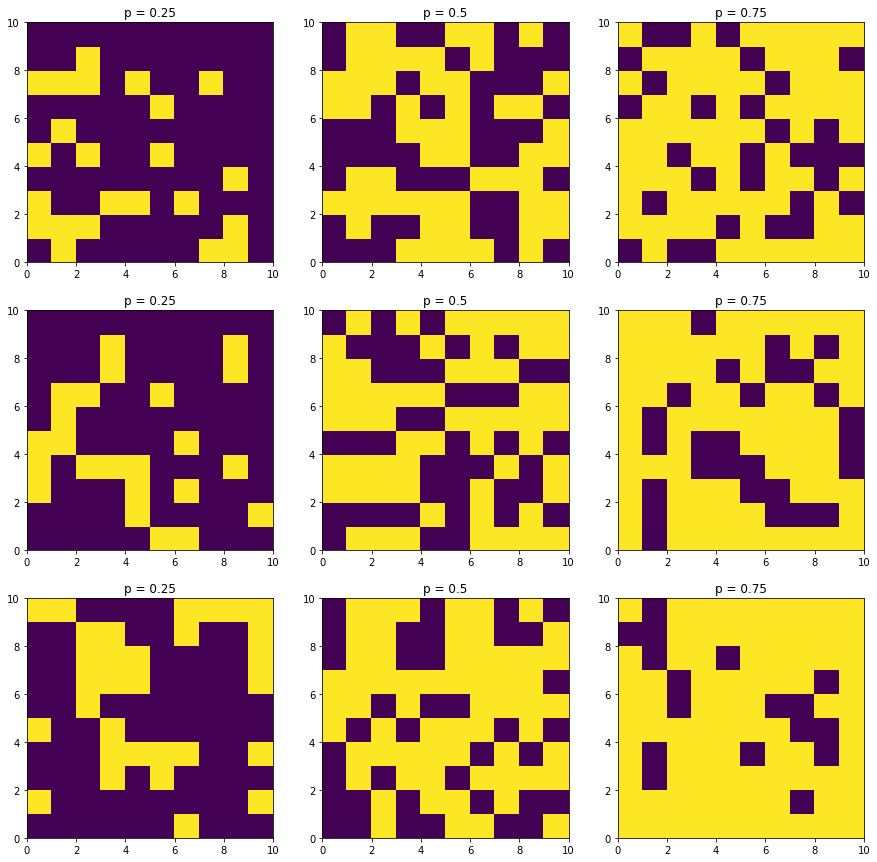

In [2]:
import matplotlib.pyplot as plt

# Create a Percolation object and a Percolation Tools object
P = Percolation(np.zeros((10,10)), RecPathFinder(SquareNeighbours()))
PT = PercolationTools(P)

trials = 3

# create subplots and some random percolations
fig, axs = plt.subplots(nrows = trials, ncols=3, figsize=(15, 15))

for i in range(0, trials):
    P.percolate(0.25)
    PT.display(axs[i,0])
    axs[i,0].set_title('p = 0.25')
    P.percolate(0.5)
    PT.display(axs[i,1])
    axs[i,1].set_title('p = 0.5')
    P.percolate(0.75)
    PT.display(axs[i,2])
    axs[i,2].set_title('p = 0.75')

Here we see $F_n(p)$ appears to be low for $p<0.5$ and large for $p>0.5$ suggesting a critical value around 0.5.

## Task 2

After visualising the problem and establishing a rough idea of this probability, we can begin to write code to compute it more accurately. We started with a recursively defined algorithm as we thought it would be significantly faster and still relatively easy to implement. You can find a loose flow diagram for the algorithm below.

![Recursive Path Finder](diagrams/recursive_algorithm.png)

The code is self-explanatory from this point - "simulate" simply runs the algorithm a given number of times and computes the fraction where there was a path connecting the left and right sides.

In [3]:
iters = 50

P_05 = Percolation(np.zeros((5, 5)), RecPathFinder(SquareNeighbours()))
P_10 = Percolation(np.zeros((10,10)), RecPathFinder(SquareNeighbours()))

print("F_5(0.25) ≈ ", P_05.simulate(iters, 0.25))
print("F_10(0.25) ≈ ", P_10.simulate(iters, 0.25))

print("F_5(0.5) ≈ ", P_05.simulate(iters, 0.5))
print("F_10(0.5) ≈ ", P_10.simulate(iters, 0.5))

print("F_5(0.75) ≈ ", P_05.simulate(iters, 0.75))
print("F_10(0.75) ≈ ", P_10.simulate(iters, 0.75))

F_5(0.25) ≈  0.0
F_10(0.25) ≈  0.0
F_5(0.5) ≈  0.3
F_10(0.5) ≈  0.2
F_5(0.75) ≈  0.96
F_10(0.75) ≈  0.96


## Task 3

Now we are faced with the challenge of making our Path Finding algorithm more efficient. Despite being happy with the speed of our recursive implementation, we found it ran into difficulty for large $n$ as we were reaching the max recursive depth of Python, this is partly due to Python not having tail-recursion optimisation. Instead we decided to develop a new similarly fast algorithm inspired by a maze-solving algorithm found in this paper (https://www.semanticscholar.org/paper/Solving-a-Reconfigurable-Maze-using-Hybrid-Wall-BakarSayutiSaman-Abdramane/146606c92916071ed6f6ae98fb27229660570bd3) that can handle large $n$.

### Robot Algorithm
##### (Inspired by 'Wall Follower Algorithm')
#### Basic Idea:
Imagine a person navigating a maze by putting their hand out on the left and holding it there as they find their way through. Our code works in a similar way, by checking the sides with a wall and find where the path continues, and where it stops.
#### Code
Let $X$ be one of the initial cells on the left side of the grid. Our robot begins at $X$ and follows the wall, only stopping when it has either reached the right boundary of the grid (success), or returned back to $X$ (failure).
#### Path or no Path:
If we visit X twice this means there is  there is no path starting from X.
We continuously check every possible X until we find a path.
If thats not the case then we conclude there is not path .
#### Failure:
This method won't necessarily work at all when the end point is in the centre of the Maze and there's a closed circuit surrounding it, as you'll go around the centre and eventually find yourself back at the beginning.
But in our case the algorithm will always work since the end point is always at the boundaries points, meaning there will always be a wall at the end.

See the following diagram for an explanation of Robot Algorithm

![Robot Diagram](diagrams/robot_percolation.jpg)

To compare we used the python's 'timeit' function.

In [4]:
import timeit

iters = 50

P_Rob = Percolation(np.zeros((20, 20)), RobotPathFinder(SquareStateChooser()))
P_Rec = Percolation(np.zeros((20, 20)), RecPathFinder(SquareNeighbours()))

print(timeit.timeit(lambda: P_Rob.simulate(iters, 0.5), number=50))
print(timeit.timeit(lambda: P_Rec.simulate(iters, 0.5), number=50))

5.26954360000002
5.700250600000004


As seen above, our Robot Algorithm works at a similar pace to our original method - however, our new code has the added benefit of allowing us the alter the dimensions of our rectangular lattice should we want to.

## Task 4

We are given that $F_n(p)$ has limit

$$F(p) = \begin{cases}
    0, & \text{if $x<p_c$}\\
    1, & \text{if $x>p_c$}
  \end{cases}$$.
  
as $n \rightarrow \infty$. This limit can by found with the aid of a visual representation of the data. Our graphical method for finding the critical value takes two parameters, the number of simulations to use and the number of decimal places we want to evaluate to.

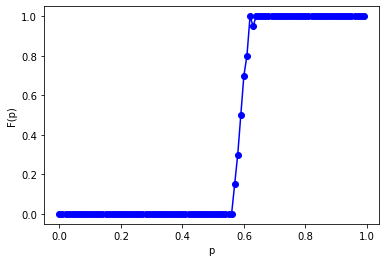

In [5]:
P = Percolation(np.zeros((100, 100)), RobotPathFinder(SquareStateChooser()))
PT = PercolationTools(P)

PT.find_critical_value_g(20, 2)

From the above we see the critical value $p_c \approx 0.6$. In order to obtain a more precise result we implemented a binary search. This works by choosing branches based on whether the simulated probability is less than or greater than $0.5$. The arguments here are the number of simulations and the number of branch points.

Each line of the output reprents the lower bound, midpoint, upper bound and $F_n(p)$ respectively.

In [6]:
print("pc = ", PT.find_critical_value_bs(100, 20))

0 0.5 1 0.0
0.5 0.75 1 1.0
0.5 0.625 0.75 0.98
0.5 0.5625 0.625 0.03
0.5625 0.59375 0.625 0.57
0.5625 0.578125 0.59375 0.09
0.578125 0.5859375 0.59375 0.33
0.5859375 0.58984375 0.59375 0.47
0.58984375 0.591796875 0.59375 0.46
0.591796875 0.5927734375 0.59375 0.53
0.591796875 0.59228515625 0.5927734375 0.54
0.591796875 0.592041015625 0.59228515625 0.49
0.592041015625 0.5921630859375 0.59228515625 0.53
0.592041015625 0.59210205078125 0.5921630859375 0.5
0.592041015625 0.592071533203125 0.59210205078125 0.34
0.592071533203125 0.5920867919921875 0.59210205078125 0.46
0.5920867919921875 0.5920944213867188 0.59210205078125 0.49
0.5920944213867188 0.5920982360839844 0.59210205078125 0.52
0.5920944213867188 0.5920963287353516 0.5920982360839844 0.47
0.5920963287353516 0.592097282409668 0.5920982360839844 0.43
pc =  0.5920977592468262


In Dr. Kim's course notes (https://web.mit.edu/ceder/publications/Percolation.pdf, page 5), they find $p_c$ to be 0.592746 which matches our result for three decimial places. We can reach 4dp of precision but didn't want to include code that took too long to run in the notebook.

## Task 5: Skipped

Task 5 involved modifying our code to allow for rectangular as well as square lattices (see diagram below). We decided not to complete this task due to the time constraints of the project and that there were other tasks that we thought would be more challenging and interesting. Also the code elegance of only using a single parameter is an added bonus.

With additional time this task can be easily completed by introducing a new variable to represent the other axis.

![Rectangular Percolation](diagrams/Q5.png)


## Task 6

Task 6 involves investigating a different probability:

$$G_n(p) = \mathbb{P}(\text{There is a yellow path connecting the centre of the grid to the boundary}).$$

See the diagram for a visual interpretation.

![Centre Path](diagrams/centre_path.png)

We decided to only use odd $n$ for this task as there is a clearly defined centre. 

For the recursive path finder this is a fairly simple change of our previous code - we now start from the centre each time and search for neighbours until we reach the boundary. For the Robot it was a little more complicated.

As described in Task 3 the case where the wall follower fails is when we start/stop at the centre of the grid. 
This happens when there is no wall for the Robot to follow. 
We were able to overcome this limitation by creating a Hybrid-Wall Robot by reversing the direction which the robot tends to follow when stuck in a continuous loop until it reaches a new wall and finish the process.

We are asked to find $G(p) = \lim_{n \rightarrow \infty} G_n(p)$. We can plot a graph and see what's going on.

We do this for the recursive algorithm and then the robot algorithm.

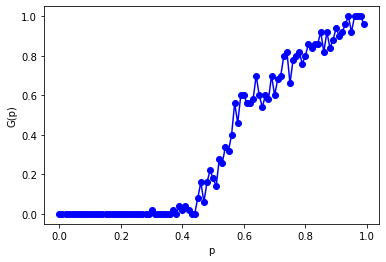

In [7]:
P = Percolation(np.zeros((21, 21)), RecPathFinder(SquareNeighbours()))
PT = PercolationTools(P)

PT.plot_centre_prob(50, 2)

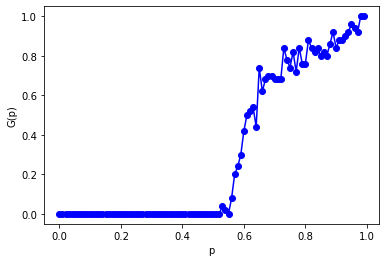

In [8]:
P = Percolation(np.zeros((101, 101)), RobotPathFinder(SquareStateChooser()))
PT = PercolationTools(P)

PT.plot_centre_prob(50, 2)

What we appear to have in the limit of these cases, is $F(p) = 0$ when $p \leq p_c$, then $F(p)$ increases rapidly before approaching a straight line and levelling off as $p \uparrow 1$. We attempted to model this with sigmoid function using scipy's optimise class.

In [9]:
import numpy as np
from scipy import optimize

G = lambda p, c1, c2: (1 + np.exp(-c1 * (p - c2)))**(-1)

xs = np.linspace(0, 1, 100)
ys = [P.simulate_centre(50, x) for x in xs]

fit_data, covariance = optimize.curve_fit(G, xs, ys)

print(fit_data, covariance)

[12.75270991  0.64821754] [[ 6.36742804e-01 -6.42315259e-06]
 [-6.42315259e-06  3.08622101e-05]]


We can now plot this function.

[0.00025690938212212825, 0.0002922189518452734, 0.00033237984773428316, 0.00037805813940182913, 0.0004300112062233489, 0.0004891002138724302, 0.0005563042836325314, 0.0006327365806202278, 0.0007196625762194863, 0.0008185207726397476]


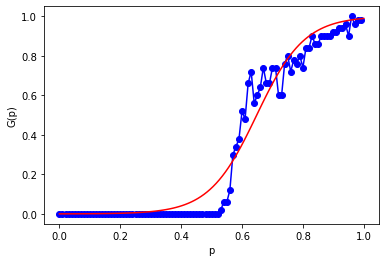

In [10]:
G_param = lambda p: G(p, fit_data[0], fit_data[1])
    
PT.plot_centre_prob(50, 2, True, G_param)

## Task 7

In task 7 we are asked to do the same again on the Triangular lattice. For the recursive PathFinder we simply need to check two additional neighbours (top right and bottom left).

The conversion from a triangular lattice to a square can seen in the diagram below.

![Triangular to Square Example](diagrams/tri_to_squ_eg.png)

We first look for $p_c$ on the triangular lattice.

In [11]:
TP = Percolation(np.zeros((100,100)), RobotPathFinder(TriangleStateChooser()))
TPT = PercolationTools(TP)

print("pc = ", TPT.find_critical_value_bs(100, 20))

0 0.5 1 0.46
0.5 0.75 1 1.0
0.5 0.625 0.75 1.0
0.5 0.5625 0.625 1.0
0.5 0.53125 0.5625 0.97
0.5 0.515625 0.53125 0.87
0.5 0.5078125 0.515625 0.71
0.5 0.50390625 0.5078125 0.48
0.50390625 0.505859375 0.5078125 0.61
0.50390625 0.5048828125 0.505859375 0.54
0.50390625 0.50439453125 0.5048828125 0.63
0.50390625 0.504150390625 0.50439453125 0.59
0.50390625 0.5040283203125 0.504150390625 0.6
0.50390625 0.50396728515625 0.5040283203125 0.59
0.50390625 0.503936767578125 0.50396728515625 0.56
0.50390625 0.5039215087890625 0.503936767578125 0.58
0.50390625 0.5039138793945312 0.5039215087890625 0.62
0.50390625 0.5039100646972656 0.5039138793945312 0.68
0.50390625 0.5039081573486328 0.5039100646972656 0.6
0.50390625 0.5039072036743164 0.5039081573486328 0.56
pc =  0.5039067268371582


Dr Kim's lecture notes give $p_c = 0.5$ for the triangular lattice so our results are pretty close. Again large $n$ can be used to obtain more precise results if desired.

We can also investigate $G$ for the triangular lattice. Due to time-constraints we were not able to extend the robot code for the centre path on the triangular lattice, however we can still investigate for $n<100$ using the recursive code.

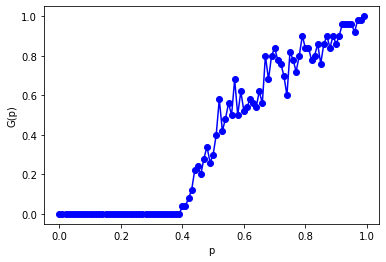

In [16]:
P = Percolation(np.zeros((51, 51)), RecPathFinder(TriangleNeighbours()))
PT = PercolationTools(P)

PT.plot_centre_prob(50,2)

Here we see similar behaviour to square the lattice except $F(p)$ increases from zero starting around $0.4$ instead of $0.6$.

## Task 8

In Task 8 we are told 

$$G(p_c+\epsilon) \approx \alpha \epsilon ^ \beta$$

on the triangle lattice and asked to find $\beta$ ($\alpha$ is a multiplicative constant). Taking logs we obtain

$$log(G(p_c + \epsilon)) = \text{log}\alpha + \beta \text{log}\epsilon.$$

So plotting this should give us a straight line with gradient $\beta$.

Text(0, 0.5, 'Log(G(p_c + epsilon))')

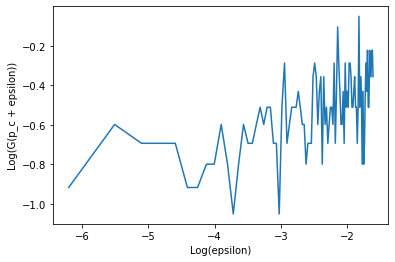

In [13]:
import numpy as np
import matplotlib.pyplot as plt

P = Percolation(np.zeros((21, 21)), RecPathFinder(TriangleNeighbours()))

epsilons = [x for x in np.linspace(0, 2e-1, 100) if x != 0]
Gs = [P.simulate_centre(20, 0.5 + e) for e in epsilons]

log_epsilons = []
log_Gs = []

for i in range(0, len(epsilons)):
    if Gs[i] != 0:
        log_epsilons.append(np.log(epsilons[i]))
        log_Gs.append(np.log(Gs[i]))

plt.plot(log_epsilons, log_Gs)
plt.xlabel("Log(epsilon)")
plt.ylabel("Log(G(p_c + epsilon))")

Random error combined with taking a logarithm causes a very noisy graph but noise seems to be about a straight line. Let's take a linear regression to find our value for $\beta$.

In [14]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression().fit(np.array(log_epsilons).reshape(-1,1), log_Gs)

print("beta = {}".format(regr.coef_[0]))

beta = 0.12012414246175515


We found this value to be quite noisy so we decided to carry out a simulation study for $\beta$.

E(beta) = 0.13920026105679417


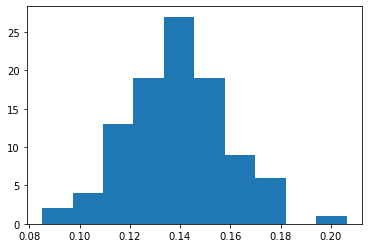

In [15]:
from sklearn.linear_model import LinearRegression

def beta():
    epsilons = [x for x in np.linspace(0, 2e-1, 100) if x != 0]
    Gs = [P.simulate_centre(30, 0.5 + e) for e in epsilons]

    log_epsilons = []
    log_Gs = []

    for i in range(0, len(epsilons)):
        if Gs[i] != 0:
            log_epsilons.append(np.log(epsilons[i]))
            log_Gs.append(np.log(Gs[i]))
    
    regr = LinearRegression().fit(np.array(log_epsilons).reshape(-1,1), log_Gs)
    
    return regr.coef_[0]

betas = [beta() for _ in range(100)]

plt.hist(betas)
print("E(beta) = {}".format(sum(betas)/len(betas)))

Again in Dr. Kim's notes, on page 25, we find $\beta = 5/36 \approx 0.1389$ so we're pretty close :) !

## Task 10

Task 10 looks at an equilateral triangle in the triangular lattice and looks to investigate the probability

$$T_n(r) = \mathbb{P}(\text{the base of the triangle is connected by a yellow path to the right
side within distance $rn$ of the top vertex}).$$

This is shown in the diagram below.

![Question 10 Example](diagrams/Q10.png)

We noticed that equilateral triangles on the trianglar lattice map to right-angled triangles in the square lattice. Thus we decided to take the triangle in the square lattice to be the right-angled triangle in the bottom-right-hand corner as shown in the diagram below.

![Triangular to Square Lattice](diagrams/tri_to_squ.png)

This means extending the code for the recursive path finder is fairly straight forward, we simply change starting condition to be the base of lattice and the breaking condition to be being on the right-hand column and within $nr$ distance of the top of the lattice. We also need to remain in the pink area for all time so we need to check that the column position is less than or equal to $n$ minus the row position.

We can simulate both different $r$ and different $n$.

Text(0, 0.5, 'T_31(r)')

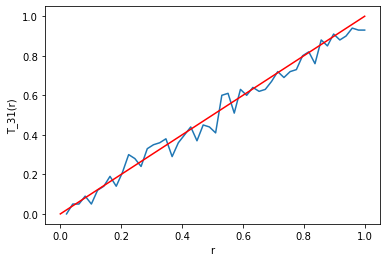

In [19]:
import numpy as np
import matplotlib.pyplot as plt

P = Percolation(np.zeros((31, 31)), RecPathFinder(TriangleNeighbours()))

rs = [r for r in np.linspace(0, 1, 50) if r != 0]
Ts = [P.simulate_bottom_right(100, 0.5, r) for r in rs]

plt.plot(rs, Ts)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), "r-")
plt.xlabel("r")
plt.ylabel("T_31(r)")

Text(0, 0.5, 'T_n(0.5)')

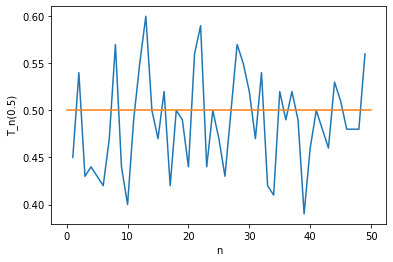

In [21]:
ns = [n for n in range(1, 50)]
Ts = [Percolation(np.zeros((n, n)), RecPathFinder(TriangleNeighbours())).simulate_bottom_right(100, 0.5, 0.5) for n in ns]

plt.plot(ns, Ts)
plt.plot(np.linspace(0,50,10), [0.5 for _ in np.linspace(0,50,10)])
plt.xlabel("n")
plt.ylabel("T_n(0.5)")

These two graphs together suggest $T_n(r) = r$ as $T_{31}(r) = r$ and $T_n(0.5) \approx 0.5$.

# Conclusion

This project looked at percolation on the square and triangular lattices. We investigated the critical probability on there exisiting a yellow path from the left to the right side of both a square and triangular lattice and used a binary search to get results close to those found in reseach papers. We looked at at the probability of there being a path from the centre to the boundary and fitted an asymtotic power law to find $\beta$ on the triangular lattice. Finally we invested the probability $T_n(r)$ and conjectured an equation for this probability.
